In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [2]:
credits = pd.read_csv("C:/Users/DELL/Downloads/archive (7)/tmdb_5000_credits.csv")
movies_df = pd.read_csv("C:/Users/DELL/Downloads/archive (7)/tmdb_5000_movies.csv")

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
credits_columns = credits.rename(index=str,columns={"movie_id":"id"})
movies=movies_df.merge(credits_columns,on='id')

In [6]:
data=movies.drop(['homepage','title_x','title_y','status','production_countries'],axis=1)

## Using Weighted average for each movie's Average Rating

In [7]:
v=data['vote_count']
R=data['vote_average']
C=data['vote_average'].mean()
m=data['vote_count'].quantile(0.7)


## Source: http://trailerpark.weebly.com/imdb-rating.html?source=post_page---------------------------

In [8]:
data['weighted_average'] = ((R*v)+(C*m))/(v+m)

Sorting the data 

In [9]:
movie_sorted_ranking=data.sort_values('weighted_average',ascending=False)
movie_sorted_ranking[['original_title','vote_count','vote_average','weighted_average','popularity']].head(20)

,original_title,vote_count,vote_average,weighted_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391
3232,Pulp Fiction,8428,8.3,8.157615,121.463076
65,The Dark Knight,12002,8.2,8.102674,187.322927
809,Forrest Gump,7927,8.2,8.056059,138.133331
1818,Schindler's List,4329,8.3,8.038748,104.469351
3865,Whiplash,4254,8.3,8.034695,192.528841
96,Inception,13752,8.1,8.018611,167.583710
1990,The Empire Strikes Back,5879,8.2,8.010426,78.517830


Text(0, 0.5, 'Movie Title')

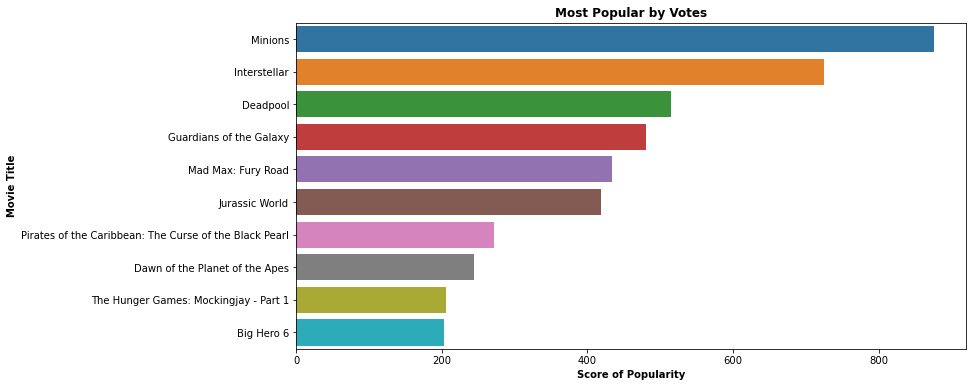

In [10]:
popularity=data.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity)

plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')

### Recommendation based on weighted average and popularity score.

Scaling the data 

In [11]:
from sklearn.preprocessing import MinMaxScaler as mms
scaling = mms()
movie_scaled=scaling.fit_transform(data[['weighted_average','popularity']])
movie_normalised= pd.DataFrame(movie_scaled,columns=['weighted_average','popularity'])
data[['normalised_weighted_average','normalised_popularity']]=movie_normalised

In [12]:
data['score'] = 0.5*data['normalised_popularity'] + 0.5*data['normalised_weighted_average']
movies_scored=data.sort_values(['score'],ascending=False)
movies_scored[['original_title','normalised_weighted_average','normalised_popularity','score']].head(20)

,original_title,normalised_weighted_average,normalised_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934991,0.213941,0.574466
3865,Whiplash,0.916431,0.219887,0.568159
3337,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953823,0.167611,0.560717


Text(0, 0.5, 'Movie Title')

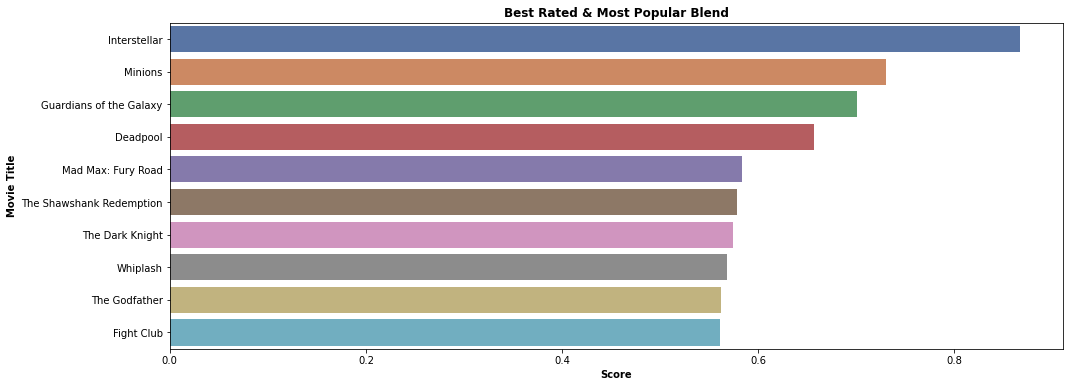

In [13]:
scored_df = data.sort_values('score', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=scored_df['score'].head(10), y=scored_df['original_title'].head(10), data=scored_df, palette='deep')


plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')


## Content Based Recommendation

In [14]:
data['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfv=TfidfVectorizer(min_df=3,max_features=None,
                   strip_accents='unicode',analyzer='word',
                    token_pattern=r'\w{1,}',ngram_range=(1,3),stop_words='english'
                   )

In [16]:
#Filling NaNs with empty strings

data['overview']=data['overview'].fillna(' ')

In [17]:
# Fitting TF-IDF on overview text

tfv_matrix=tfv.fit_transform(data['overview'])

In [28]:
tfv_matrix.shape 

(4803, 10417)

In [30]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim=linear_kernel(tfv_matrix,tfv_matrix)

In [44]:
cosine_sim[5]

array([0.02698255, 0.        , 0.00266519, ..., 0.01832476, 0.00504616,
       0.01225208])

In [50]:
indices=pd.Series(data.index, index=data['original_title']).drop_duplicates()

Checking the recommendation

In [54]:
indices[0:5]

original_title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

In [55]:
cosine_sim[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [62]:
sorted(list(enumerate(cosine_sim[0])),key= lambda x:x[1],reverse=True)[1:11]

[(1341, 0.20925107609846516),
 (634, 0.20548453580005477),
 (3604, 0.18069216059298365),
 (2130, 0.1742568977678487),
 (775, 0.16421163130645072),
 (529, 0.1273206865689873),
 (151, 0.11717426124449504),
 (311, 0.11588314391368182),
 (847, 0.10899110118197398),
 (942, 0.10112725391794232)]

In [74]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return data['original_title'].iloc[movie_indices]

In [75]:
get_recommendations('Avatar')

1341                Obitaemyy Ostrov
634                       The Matrix
3604                       Apollo 18
2130                    The American
775                        Supernova
529                 Tears of the Sun
151                          Beowulf
311     The Adventures of Pluto Nash
847                         Semi-Pro
942                 The Book of Life
Name: original_title, dtype: object

In [76]:
get_recommendations('The Godfather')

2731     The Godfather: Part II
1873                 Blood Ties
3727                Snabba Cash
867     The Godfather: Part III
3623                       Made
3960               The Deported
2389                Renaissance
2464     The Master of Disguise
3760             The Jerky Boys
3164               Mine vaganti
Name: original_title, dtype: object